# K-means

## Algo
1. Define ```k``` and ```max_iter``` (maximum number of_iterations)
2. Compute *k* random centroids
3. Until max number of iterations not reached:
    - Assign to each training sample its nearest centroid
    - Udpate centroid coordinates

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

class MyKmeans:
    '''
    desc: Implementation of Kmeans algorithm
    1.Define k and max_iter (maximum number of_iterations)
    2.Compute k random centroids
    3.Until max number of iterations not reached:
        - Assign to each training sample its nearest centroid
        - Udpate centroid coordinates
    '''
    def __init__(self, k, max_iter=100, verbose=False, random_state=42):
        self.k = k
        self.verbose = verbose
        self.rs = random_state
        self.centroids = None
        self.max_iter = max_iter
        self.labels = np.array(range(self.k))
        self.classes = None
        self.inertia = None
        if verbose:
            print('*****  Initialization of Kmeans with {} clusters  *****'.format(self.k))
            print('\tmax_iter: \t', self.max_iter)
            print('\tlabels: \t', self.labels)
            print('\trandom state: \t', self.rs)
            print('\tverbose: \t', self.verbose)                                 
            print('******************************************************')
    
    def fit(self, X):
        '''
        desc: This function trains kmeans on X with k clusters
            --> At the end, a label will be assigned to each sample of X and be stored in classes attribute
        '''
       
        self.X_forme=X.shape
        taille =np.empty(shape=(self.X_forme[1],2),dtype=np.float32)
        taille[:,0]=np.min(X,axis=0)
        taille[:,1]=np.max(X,axis=0)
        
        self.init_centroids(taille)
        
        
       
        
        
        # until stopping criteria is reached ... : TODO
        for i in range(self.max_iter):
            test = KNeighborsClassifier(n_neighbors=1)
            test.fit(self.centroids,self.labels)
            
           
          
            current_clusters = test.predict(X) 
            
            
            
            
            new_centers = []
           
            for compteur3 in range(len(self.labels)):
                Sommes=0
                Longeur=1
                for compteur4 in range(len(current_clusters)):
                    if self.labels[compteur3]==current_clusters[compteur4]:
                        Longeur=Longeur+1
                        Sommes=X[compteur4]+Sommes
                new_centers.append((Sommes+self.centroids[compteur3])/Longeur)
        
        
        
        
            self.centroids = new_centers # updating old centroids with new ones 
            
        self.classes = current_clusters # here are stored the nearest cluster of each sample in X
        
        # computing inertia
        self.ssd(X)
        
        if self.verbose:
            print('Model trained in {} iterations...'.format(i+1))
        
        
        
    def init_centroids(self,taille):
      
        
        np.random.seed(self.rs)
        self.centroids=np.empty(shape=(self.k,self.X_forme[1]),dtype=np.float32)
        
        for compteur5 in range(len(taille)):
            self.centroids[:,compteur5]=np.random.uniform(taille[compteur5,0],taille[compteur5,1],size=(1,self.k))
        
        return self.centroids

        
    
    def ssd(self,X):
      
        res = 0
        for compteur in range (len(self.labels)):
            for compteur2 in range(len(self.classes)):
                if self.labels[compteur]==self.classes[compteur2]:
                    res=res+np.sum((X[compteur2]-self.centroids[compteur])**2)
        self.inertia = res
        
    def predict(self,X):
         
        modele = KNeighborsClassifier(n_neighbors=1)
        modele.fit=(self.centroids,self.labels)
        predictions=modele.predicts(X)
        return predictions


## 1. Visualisation des données

Charger la base de données (Customers_practice.csv).

In [24]:
import pandas as pd
dfCustomer_pratice = pd.read_csv("Customers_practice.csv")

Afficher les 10 premières lignes du jeu de données (fonction head()). Déterminer le
nombre d’exemples, ainsi que le nombre de features pour ce problème.

In [33]:
dfCustomer_pratice.head(10)

,Annual_Income_(k$),Spending_Score
0,103,85
1,60,52
2,59,55
3,62,55
4,48,47
5,44,50
6,73,5
7,33,92
8,71,75
9,21,66


In [34]:
dfCustomer_pratice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Annual_Income_(k$)  170 non-null    int64
 1   Spending_Score      170 non-null    int64
dtypes: int64(2)
memory usage: 2.8 KB


Il y a donc 170 exemples et 2 features

Afficher les données à l’aide d’un scatterplot (utiliser la librairie seaborn ou matplotlib). Vous devriez obtenir un graphe similaire à celui-ci (penser à la légende et au titre) :

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'Dataset')

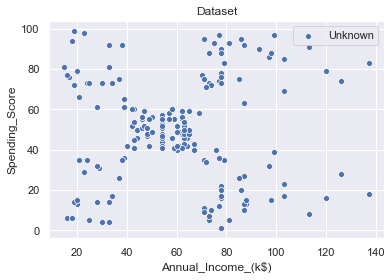

In [35]:
sns.scatterplot(data=dfCustomer_pratice, x=dfCustomer_pratice.columns[0], y=dfCustomer_pratice.columns[1])
plt.legend(["Unknown"], loc="upper right")
plt.title("Dataset")

## 2. K-means algorithm

In [7]:
km = MyKmeans(3)
km.fit(dfCustomer_pratice.iloc[:,:].values)
km.inertia

91570.07313519812

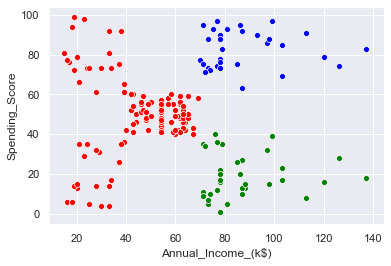

In [8]:
import seaborn as sns

color=["red","blue","green"]

for i in range (3):
    sns.scatterplot(dfCustomer_pratice.iloc[km.classes==i,0],dfCustomer_pratice.iloc[km.classes==i,1],color=color[i]) 
    


Ici nous affichons nos données avec comme couleurs leurs classes respectives

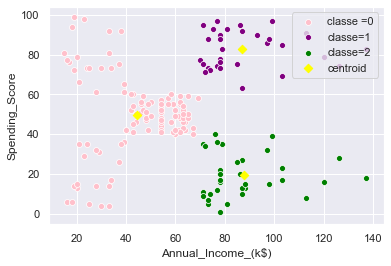

In [69]:

import seaborn as sns

color=["pink","purple","green"]

for i in range (3):
    sns.scatterplot(dfCustomer_pratice.iloc[km.classes==i,0],dfCustomer_pratice.iloc[km.classes==i,1],color=color[i]) 
    
for i in range (3):
    plt.scatter(x=km.centroids[i][0],y=km.centroids[i][1],color="yellow",marker="D")
    
plt.legend(["classe =0","classe=1","classe=2","centroid"], loc="upper right")

Nous refaisons la même chose mais avec l'information des centroïdes

k=3 ne semble pas la meilleure solution car notre répartition de donnée montre de grande distance entre le centroïde de la classe 0 et ses données les plus extrêmes

## 3. Trouver la valeur optimale de k

In [39]:
inertie=[]
inertie=np.array(inertie)
for i in range(1,21):
    km2 = MyKmeans(i)
    km2.fit(dfCustomer_pratice.iloc[:,:].values)
    inertie=np.append(inertie,km2.inertia)
  



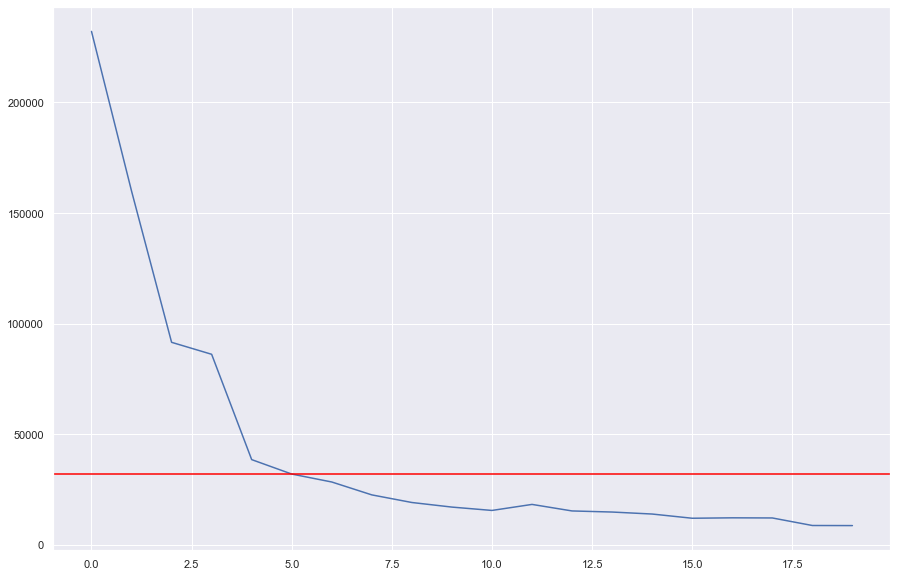

In [54]:
plt.figure(figsize=(15,10))
plt.plot(np.array(range(20)),inertie)

plt.axhline(y=inertie[5], color="red")

Voici l'affichage de notre courbe. Nous avons appliqué la méthode du coude est donc, la valeur optinal de **k est 5.**

In [78]:
km5 = MyKmeans(5)
km5.fit(dfCustomer_pratice.iloc[:,:].values)
km5.inertia

38565.48885652866

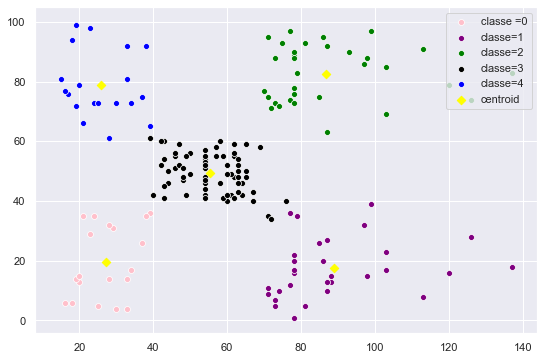

In [79]:
import seaborn as sns

color=["pink","purple","green","black","blue","red","sienna","aqua","grey","orange"]
plt.figure(figsize=(9,6))

for i in range (5):
  
    sns.scatterplot(dfCustomer_pratice.iloc[km5.classes==i,0].values,dfCustomer_pratice.iloc[km5.classes==i,1].values,color=color[i]) 
    
for i in range (5):
    plt.scatter(x=km5.centroids[i][0],y=km5.centroids[i][1],color="yellow",marker="D")
    
plt.legend(["classe =0","classe=1","classe=2","classe=3","classe=4","centroid"], loc="upper right")

Voici l'affichage des cluster pour 5 classes. Nous pouvons remarqué que la classe 0 est celle des personnes avec un faible revenue et qui dépense peu. La classe 1 est quant à elle très dépensière mais avec toujours un faible salaire. Le cluster au centre de l'écran, et qui représente la classe 3, est le plus modéré (c'est à dire un revenue moyen et une dépense raisoné). Les 2 dernières classes sont les clusters de personnes les plus riches avec la classe 2 qui est pus dépensière et la 4 qui est pour le coup dépense beaucoup.

On peux conclure que dans les extrème de salaires il y a de tout niveau dépense mais les personnes qui sont dans la classe moyenne sont raisonnable.

## 5 Aller plus loin

In [14]:
dftest = pd.read_csv("Customers_practice_test.csv")

Chargement des données

In [63]:
dftest.head()

,Annual_Income_(k$),Spending_Score
0,62,42
1,19,3
2,48,50
3,87,75
4,88,69


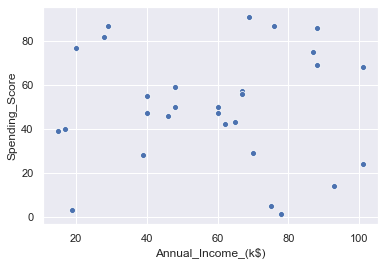

In [64]:
sns.scatterplot(data=dftest, x=dftest.columns[0], y=dftest.columns[1])

In [55]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Annual_Income_(k$)  30 non-null     int64
 1   Spending_Score      30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


Ce dataframe est formé de 30 exemple et 2 feature (les mêmes qu'avant)

Determination de la classe  du df de test :

In [57]:
km5 = MyKmeans(5)
km5.fit(dftest.iloc[:,:].values)


In [58]:
def save(predictions):
    '''
    predictions of kmeans
    '''
    column = ['prediction']
    res_df = pd.DataFrame(predictions, columns=column)
    print(res_df)
    res_df.to_csv('resultats.csv', index=None)

In [59]:
preds = km5.classes

In [60]:
save(preds) # execute the cell to generate resultats.csv

    prediction
0            3
1            0
2            3
3            2
4            2
5            3
6            4
7            4
8            2
9            2
10           3
11           3
12           4
13           3
14           3
15           2
16           1
17           4
18           3
19           3
20           0
21           3
22           2
23           1
24           1
25           3
26           4
27           4
28           1
29           3


In [61]:
data=dftest.columns
print(data)

Index(['Annual_Income_(k$)', 'Spending_Score'], dtype='object')


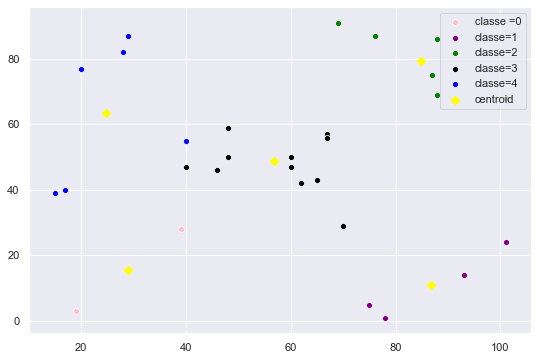

In [76]:
import seaborn as sns

color=["pink","purple","green","black","blue","red","sienna","aqua","grey","orange"]
plt.figure(figsize=(9,6))

for i in range (5):
  
    sns.scatterplot(dftest.iloc[preds==i,0].values,dftest.iloc[preds==i,1].values,color=color[i]) 
    
for i in range (5):
    plt.scatter(x=km5.centroids[i][0],y=km5.centroids[i][1],color="yellow",marker="D")
    
plt.legend(["classe =0","classe=1","classe=2","classe=3","classe=4","centroid"], loc="upper right")

En affichant nos prévisons nous remarquons que cela est en adéquation avec nos observations précédentes 

In [80]:
X=dftest.iloc[:,:].values

Y=km5.predict(np.c_[xx1.ravel(),yy1.ravel()])

AttributeError: 'KNeighborsClassifier' object has no attribute 'predicts'

In [81]:

h = .02 # Espacement du mesh
x_min, x_max = X[:, 0].min()*1.1, X[:, 0].max()*1.1
y_min, y_max = X[:, 1].min()*1.1, X[:, 1].max()*1.1
xx1, yy1 = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


color=["pink","purple","green","black","blue","red","sienna","aqua","grey","orange"]
i=0
plt.figure(figsize=(9,6))
plt.contour(xx1,yy1,Y,cmap=plt.cm.Paired, alpha=0.8)


for lee in km5.classes:
    plt.scatter(km[km.classes==lee][data[0]],km[km.classes==lee][data[1]],c=color[i])
    i+=1

plt.xlim(xx1.min(),xx1.max())
plt.ylim(yy1.min(),yy1.max())
plt.show()


NameError: name 'Y' is not defined

<Figure size 648x432 with 0 Axes>

Nous n'avons malheureusement pas réussi à dessiner les frontières de décisions  